In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from warnings import filterwarnings

In [65]:
filterwarnings('ignore')

In [66]:
projet = pd.read_csv('creditBanc.csv')

In [67]:
projet.head(10)

,Client_ID,Sexe,Situation_familiale,Personnes_charge,Diplome,Travailleur_independant,Revenu_imposable,Revenu_forfitaire,Montant_pret,Duree_pret,Hitorique_credit,Residence,Decision
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Identification des colonnes ayant des valeurs manquantes

In [68]:
projet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Client_ID                614 non-null    object 
 1   Sexe                     601 non-null    object 
 2   Situation_familiale      611 non-null    object 
 3   Personnes_charge         599 non-null    float64
 4   Diplome                  614 non-null    object 
 5   Travailleur_independant  582 non-null    object 
 6   Revenu_imposable         614 non-null    int64  
 7   Revenu_forfitaire        614 non-null    float64
 8   Montant_pret             592 non-null    float64
 9   Duree_pret               600 non-null    float64
 10  Hitorique_credit         564 non-null    float64
 11  Residence                614 non-null    object 
 12  Decision                 614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


# Obtenir une liste des colonnes avec au moins une donnée manquante

In [69]:
projet.columns[projet.isna().any()]
#'any()' : C'est une méthode Pandas utilisée pour vérifier s'il y a au moins une valeur True dans chaque colonne (ou série) de la structure de données. Elle renvoie une série
#(ou un DataFrame si appliquée à un DataFrame) contenant des valeurs booléennes indiquant si au moins une valeur nulle a été trouvée dans chaque colonne.


Index(['Sexe', 'Situation_familiale', 'Personnes_charge',
       'Travailleur_independant', 'Montant_pret', 'Duree_pret',
       'Hitorique_credit'],
      dtype='object')

In [70]:
projet.columns[projet.isnull().any(axis=0)]

Index(['Sexe', 'Situation_familiale', 'Personnes_charge',
       'Travailleur_independant', 'Montant_pret', 'Duree_pret',
       'Hitorique_credit'],
      dtype='object')

In [71]:
tf = projet.isna().any(axis=0)
tf

Client_ID                  False
Sexe                        True
Situation_familiale         True
Personnes_charge            True
Diplome                    False
Travailleur_independant     True
Revenu_imposable           False
Revenu_forfitaire          False
Montant_pret                True
Duree_pret                  True
Hitorique_credit            True
Residence                  False
Decision                   False
dtype: bool

In [72]:
tf[tf].index.values

array(['Sexe', 'Situation_familiale', 'Personnes_charge',
       'Travailleur_independant', 'Montant_pret', 'Duree_pret',
       'Hitorique_credit'], dtype=object)

# Nombre de données manquantes par collone

In [73]:
projet.isnull().sum(axis = 0) #somme des  'True' des colonnes

Client_ID                   0
Sexe                       13
Situation_familiale         3
Personnes_charge           15
Diplome                     0
Travailleur_independant    32
Revenu_imposable            0
Revenu_forfitaire           0
Montant_pret               22
Duree_pret                 14
Hitorique_credit           50
Residence                   0
Decision                    0
dtype: int64

# Supprimer les lignes avec des valeurs manquantes dans les colonnes de variables qualitatives 

In [74]:
projet.dropna(subset = ['Sexe', 'Situation_familiale', 'Travailleur_independant'], inplace = True)

In [75]:
projet

,Client_ID,Sexe,Situation_familiale,Personnes_charge,Diplome,Travailleur_independant,Revenu_imposable,Revenu_forfitaire,Montant_pret,Duree_pret,Hitorique_credit,Residence,Decision
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Remplacer les valeurs manquantes des colonnes numériques par la valeur précedente de la même colonne

In [76]:
projet.fillna(method = 'bfill', inplace = True)

In [77]:
projet

,Client_ID,Sexe,Situation_familiale,Personnes_charge,Diplome,Travailleur_independant,Revenu_imposable,Revenu_forfitaire,Montant_pret,Duree_pret,Hitorique_credit,Residence,Decision
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [78]:
projet.isnull().sum(axis=0)

Client_ID                  0
Sexe                       0
Situation_familiale        0
Personnes_charge           0
Diplome                    0
Travailleur_independant    0
Revenu_imposable           0
Revenu_forfitaire          0
Montant_pret               0
Duree_pret                 0
Hitorique_credit           0
Residence                  0
Decision                   0
dtype: int64

Notre Dataset est désormais complet !

# Remplacement des mots "Male" et "Female" respectivement par 1 et 0

In [79]:
#projet['Sexe'].replace(['Male','Female'], [1,0], inplace = True)
projet['Sexe'].replace({'Male': 1, 'Female': 0}, inplace=True)

In [80]:
projet

,Client_ID,Sexe,Situation_familiale,Personnes_charge,Diplome,Travailleur_independant,Revenu_imposable,Revenu_forfitaire,Montant_pret,Duree_pret,Hitorique_credit,Residence,Decision
0,LP001002,1,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Remplacement des mots "Yes" et "No" dans les colonnes "Situation_familiale" et "Travailleur_independant", respectivement par 1 et 0

In [81]:
projet['Situation_familiale'].replace(['Yes','No'], [1,0], inplace = True)
projet['Travailleur_independant'].replace(['Yes','No'], [1,0], inplace = True)

In [82]:
projet

,Client_ID,Sexe,Situation_familiale,Personnes_charge,Diplome,Travailleur_independant,Revenu_imposable,Revenu_forfitaire,Montant_pret,Duree_pret,Hitorique_credit,Residence,Decision
0,LP001002,1,0,0.0,Graduate,0,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,1,1,1.0,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0.0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0.0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0.0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,Graduate,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,3.0,Graduate,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1.0,Graduate,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2.0,Graduate,0,7583,0.0,187.0,360.0,1.0,Urban,Y


# Remplacement des mots "Graduate" et "Not Graduate" de la colonne Diplome respectivement par 1 et 0

In [83]:
projet['Diplome'].replace(['Graduate','Not Graduate'], [1,0], inplace = True)

In [84]:
projet

,Client_ID,Sexe,Situation_familiale,Personnes_charge,Diplome,Travailleur_independant,Revenu_imposable,Revenu_forfitaire,Montant_pret,Duree_pret,Hitorique_credit,Residence,Decision
0,LP001002,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,Urban,Y


# Remplacement des mots "Urban", "Semiurban" et "Rural" de la colonne Residence respectivement par 2,1 et 0

In [85]:
projet['Residence'].replace(['Urban','Semiurban','Rural'], [2,1,0], inplace = True)

In [86]:
projet

,Client_ID,Sexe,Situation_familiale,Personnes_charge,Diplome,Travailleur_independant,Revenu_imposable,Revenu_forfitaire,Montant_pret,Duree_pret,Hitorique_credit,Residence,Decision
0,LP001002,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,2,Y
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,2,Y


# Repmlacement de "Y" et "N" de la colonne Decision respectivement par 1 et 0

In [87]:
projet['Decision'].replace(['Y','N'], [1,0], inplace = True)

In [88]:
projet

,Client_ID,Sexe,Situation_familiale,Personnes_charge,Diplome,Travailleur_independant,Revenu_imposable,Revenu_forfitaire,Montant_pret,Duree_pret,Hitorique_credit,Residence,Decision
0,LP001002,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,2,1


# Suppression de la colonne "Client_ID"

In [89]:
projet.drop('Client_ID', axis=1, inplace = True)

In [90]:
projet

,Sexe,Situation_familiale,Personnes_charge,Diplome,Travailleur_independant,Revenu_imposable,Revenu_forfitaire,Montant_pret,Duree_pret,Hitorique_credit,Residence,Decision
0,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,2,1


# Selection des colonnes des variables explicatives et de la variable à expliquer (à prédire)

In [91]:
projet.columns

Index(['Sexe', 'Situation_familiale', 'Personnes_charge', 'Diplome',
       'Travailleur_independant', 'Revenu_imposable', 'Revenu_forfitaire',
       'Montant_pret', 'Duree_pret', 'Hitorique_credit', 'Residence',
       'Decision'],
      dtype='object')

In [92]:
X = projet[['Sexe', 'Situation_familiale', 'Personnes_charge', 'Diplome',
       'Travailleur_independant', 'Revenu_imposable', 'Revenu_forfitaire',
       'Montant_pret', 'Duree_pret', 'Hitorique_credit', 'Residence']]

In [93]:
X.head(20)

,Sexe,Situation_familiale,Personnes_charge,Diplome,Travailleur_independant,Revenu_imposable,Revenu_forfitaire,Montant_pret,Duree_pret,Hitorique_credit,Residence
0,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2.0,1,1,5417,4196.0,267.0,360.0,1.0,2
6,1,1,0.0,0,0,2333,1516.0,95.0,360.0,1.0,2
7,1,1,3.0,1,0,3036,2504.0,158.0,360.0,0.0,1
8,1,1,2.0,1,0,4006,1526.0,168.0,360.0,1.0,2
9,1,1,1.0,1,0,12841,10968.0,349.0,360.0,1.0,1


In [94]:
y = projet['Decision']

In [95]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Decision, Length: 566, dtype: int64

# Décomposition des données en données d'entrainement et données de test 

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 101)
print('Données d\'entrainement:',X_train.shape )
print('Données de test:',X_test.shape)

Données d'entrainement: (424, 11)
Données de test: (142, 11)


# Création du modèle (instanciation) de type KNeighborsClassifier

In [97]:
model = KNeighborsClassifier()

In [98]:
model.fit(X_train, y_train)

KNeighborsClassifier()

# Prédiction

In [99]:
predictions = model.predict(X_test)

# Performance du modèle sur la base des données d'entrainement

In [100]:
model.score(X_train, y_train)

0.7405660377358491

# Performance du modèle sur la base des données de test

In [101]:
model.score(X_test, y_test)

0.6690140845070423

# Optimisation du modèle grace à GridSearchCV

In [102]:
grid_param = {'n_neighbors': np.arange(1,25),
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'minkowski']}

In [103]:
grid = GridSearchCV(KNeighborsClassifier(), grid_param, cv = 10)

In [104]:
X_train.shape

(424, 11)

In [105]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']})

# Meilleur score

In [106]:
grid.best_score_

0.6932447397563677

# Mailleurs paramètres

In [107]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 22, 'weights': 'uniform'}

# Sauvegarde du modèle

In [108]:
model = grid.best_estimator_

In [109]:
model

KNeighborsClassifier(metric='manhattan', n_neighbors=22)

In [110]:
model.score(X_test, y_test)

0.647887323943662

In [149]:
model.predict([[1,1,2,1,0,7800,2300,350,480,1,2]])

array([1], dtype=int64)

### Visualiser la learning curve:

In [150]:
data , score_apprentissage, score_validation = learning_curve(model, X_train, y_train, cv = 10,
                                                             train_sizes = np.linspace(0.2,1,10))

In [151]:
data

array([ 76, 110, 143, 177, 211, 245, 279, 313, 347, 381])

In [152]:
score_apprentissage

array([[0.65789474, 0.67105263, 0.73684211, 0.73684211, 0.73684211,
        0.73684211, 0.73684211, 0.73684211, 0.73684211, 0.73684211],
       [0.67272727, 0.66363636, 0.66363636, 0.68181818, 0.68181818,
        0.68181818, 0.68181818, 0.68181818, 0.68181818, 0.68181818],
       [0.66433566, 0.65734266, 0.65034965, 0.62937063, 0.65734266,
        0.65734266, 0.65734266, 0.65734266, 0.65734266, 0.65734266],
       [0.66666667, 0.65536723, 0.66101695, 0.66666667, 0.6779661 ,
        0.6779661 , 0.6779661 , 0.6779661 , 0.6779661 , 0.6779661 ],
       [0.68246445, 0.67772512, 0.67772512, 0.68246445, 0.67772512,
        0.69668246, 0.67298578, 0.67298578, 0.67298578, 0.67298578],
       [0.70204082, 0.70612245, 0.70204082, 0.70204082, 0.69795918,
        0.70204082, 0.68163265, 0.66938776, 0.66938776, 0.66938776],
       [0.70967742, 0.70967742, 0.70967742, 0.70967742, 0.70609319,
        0.70967742, 0.70967742, 0.69175627, 0.69175627, 0.69175627],
       [0.70926518, 0.70926518, 0.7028754

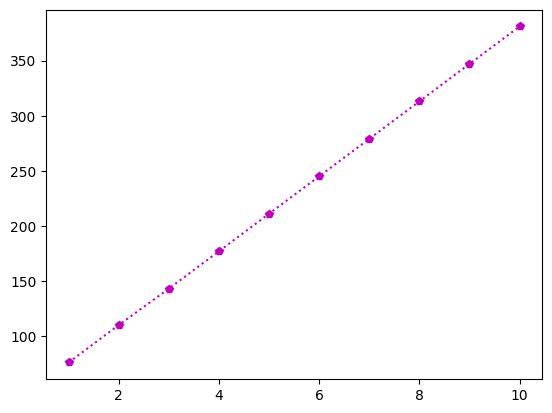

In [153]:
plt.plot(np.arange(1,11),data , "mp:")

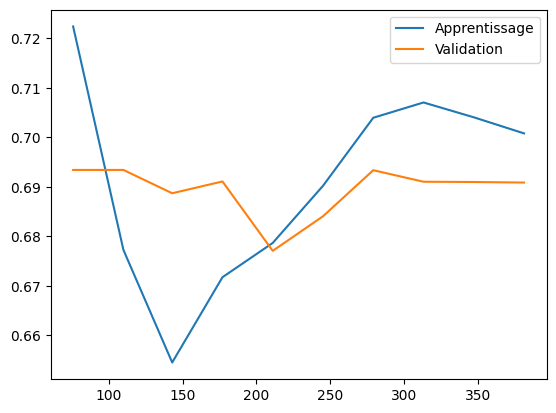

In [154]:
plt.plot(data, score_apprentissage.mean(axis = 1), label = 'Apprentissage')
plt.plot(data, score_validation.mean(axis =1), label = 'Validation')
plt.legend()